## Importar librerías e inicializar variables

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

In [85]:
############# HTRU_2 Dataset #########
names_HTRU = [
	'Mean_i_p',
	'Standard_deviation_i_p',
	'Excess_kurtosis_i_p',
	'Skewness_i_p',
	'Mean_DM-SNR_curve',
	'Standard_deviation_DM-SNR_curve',
	'Excess_kurtosis_DM-SNR_curve',
	'Skewness_DM-SNR_curve', 
	'Class'
]

data_HTRU = pd.read_csv("../Datasets/HTRU_2.csv", delimiter = ",", decimal = ".", names=names_HTRU)

lda_model1_HTRU = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
lda_model2_HTRU = LinearDiscriminantAnalysis(solver='svd')
lda_model3_HTRU = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5)
lda_model4_HTRU = LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.5)


## Pre-procesado de datos

In [9]:
############# HTRU_2 Dataset #########
target_HTRU = data_HTRU['Class']
train_HTRU = data_HTRU.drop('Class', axis=1)

X_train_HTRU, X_test_HTRU, y_train_HTRU, y_test_HTRU = train_test_split(train_HTRU, target_HTRU, random_state=0, test_size=.5)

## Feature Engineering

#### 1. Selección de feature set con solver=eigen

In [10]:
############# HTRU_2 Dataset #########

select_HTRU = SelectFromModel(lda_model1_HTRU, threshold=0.03)
select_HTRU.fit(X_train_HTRU, y_train_HTRU)
X_train_s_HTRU = select_HTRU.transform(X_train_HTRU)

print('Número de features original para HTRU: ', X_train_HTRU.shape)
print('Número de features seleccionados para HTRU: ', X_train_s_HTRU.shape)

Número de features original para HTRU:  (8949, 8)
Número de features seleccionados para HTRU:  (8949, 4)


Text(0.5,0,'Features HTRU')

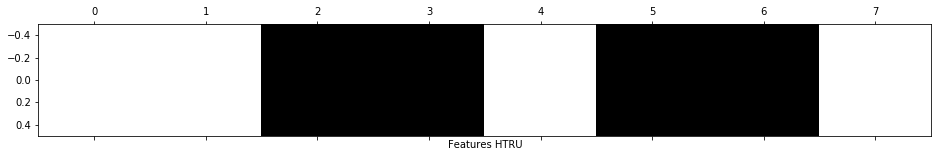

In [11]:
mask_HTRU = select_HTRU.get_support()
plt.matshow(mask_HTRU.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features HTRU')

In [12]:
#f_lda_HTRU = pd.DataFrame(np.asarray(train_HTRU)[:,select_HTRU.get_support()])
#f_lda_HTRU.to_csv('features_lda_HTRU.csv', header=None, index=None)

In [13]:
#Features extraídos
num = np.array(range(0,8))
num[select_HTRU.get_support()]

array([2, 3, 5, 6])

#### 2. Selección de feature set con solver=svd

In [91]:
############# HTRU_2 Dataset #########

select_HTRU = SelectFromModel(lda_model2_HTRU, threshold=0.12)
select_HTRU.fit(X_train_HTRU, y_train_HTRU)
X_train_s_HTRU = select_HTRU.transform(X_train_HTRU)

print('Número de features original para HTRU: ', X_train_HTRU.shape)
print('Número de features seleccionados para HTRU: ', X_train_s_HTRU.shape)

Número de features original para HTRU:  (8949, 8)
Número de features seleccionados para HTRU:  (8949, 4)


Text(0.5,0,'Features HTRU')

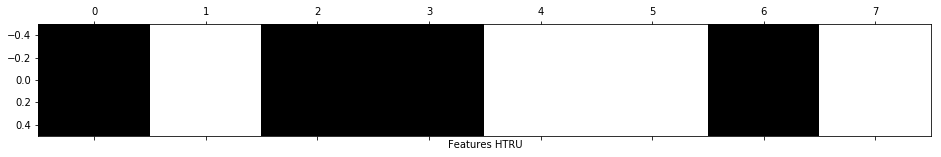

In [92]:
mask_HTRU = select_HTRU.get_support()
plt.matshow(mask_HTRU.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features HTRU')

In [93]:
#Features extraídos
num = np.array(range(0,8))
num[select_HTRU.get_support()]

array([0, 2, 3, 6])

#### 3. Selección de feature set con solver=lsqr

In [61]:
############# HTRU_2 Dataset #########

select_HTRU = SelectFromModel(lda_model3_HTRU, threshold=0.015)
select_HTRU.fit(X_train_HTRU, y_train_HTRU)
X_train_s_HTRU = select_HTRU.transform(X_train_HTRU)

print('Número de features original para HTRU: ', X_train_HTRU.shape)
print('Número de features seleccionados para HTRU: ', X_train_s_HTRU.shape)

Número de features original para HTRU:  (8949, 8)
Número de features seleccionados para HTRU:  (8949, 4)


Text(0.5,0,'Features HTRU')

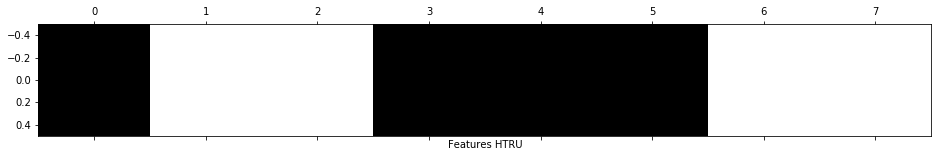

In [62]:
mask_HTRU = select_HTRU.get_support()
plt.matshow(mask_HTRU.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features HTRU')

In [63]:
#Features extraídos
num = np.array(range(0,8))
num[select_HTRU.get_support()]

array([0, 3, 4, 5])

#### 4 Selección de feature set con solver=eigen shrinkage=0.5

In [88]:
############# HTRU_2 Dataset #########

select_HTRU = SelectFromModel(lda_model4_HTRU, threshold=19.9)
select_HTRU.fit(X_train_HTRU, y_train_HTRU)
X_train_s_HTRU = select_HTRU.transform(X_train_HTRU)

print('Número de features original para HTRU: ', X_train_HTRU.shape)
print('Número de features seleccionados para HTRU: ', X_train_s_HTRU.shape)

Número de features original para HTRU:  (8949, 8)
Número de features seleccionados para HTRU:  (8949, 4)


Text(0.5,0,'Features HTRU')

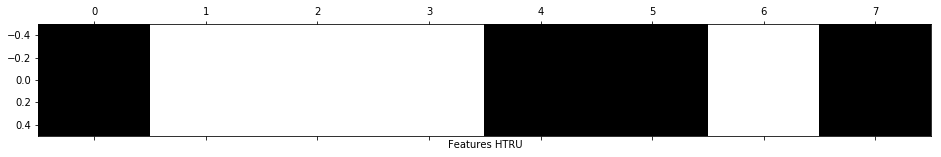

In [89]:
mask_HTRU = select_HTRU.get_support()
plt.matshow(mask_HTRU.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features HTRU')

In [90]:
#Features extraídos
num = np.array(range(0,8))
num[select_HTRU.get_support()]

array([0, 4, 5, 7])